In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import datetime

In [2]:
#FETCHING DAILY DATA 
current_date = datetime.date.today()

url = f'https://api.upstox.com/v2/historical-candle/NSE_EQ|INE002A01018/day/{current_date}/2023-04-01'
headers = {
    'Accept': 'application/json'
}

response = requests.get(url, headers=headers)

# Check the response status
if response.status_code == 200:
    # Do something with the response data (e.g., print it)
    df = response.json()
else:
    # Print an error message if the request was not successful
    print(f"Error: {response.status_code} - {response.text}")

In [3]:
# Storing relevant data into dataframe
df = df["data"]["candles"]
# df

In [4]:
df = pd.DataFrame(df, columns=['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'OI'])

# Convert the 'Datetime' column to datetime objects
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set the 'Datetime' column as the index and keep only the date part
df.set_index(df['Datetime'].dt.date, inplace=True)

# Drop the redundant 'Datetime' column
df.drop(columns='Datetime', inplace=True)

# Reverse the order of rows
df = df.iloc[::-1]

# Display the updated DataFrame
print(df)

               Open     High      Low    Close   Volume  OI
Datetime                                                   
2023-04-03  2345.00  2349.00  2315.00  2331.45  4750238   0
2023-04-05  2348.00  2348.00  2308.55  2325.85  7505339   0
2023-04-06  2318.15  2354.00  2318.15  2341.45  8507771   0
2023-04-10  2350.00  2350.40  2321.55  2324.85  5981688   0
2023-04-11  2334.00  2341.00  2324.05  2336.35  4865301   0
...             ...      ...      ...      ...      ...  ..
2024-04-16  2906.70  2942.35  2901.85  2931.50  4683092   0
2024-04-18  2927.00  2972.00  2918.70  2928.65  9502846   0
2024-04-19  2913.55  2948.00  2886.05  2940.25  7870889   0
2024-04-22  2944.90  2965.65  2935.60  2959.70  5175181   0
2024-04-23  2958.00  2987.00  2911.10  2918.65  7302777   0

[261 rows x 6 columns]


In [5]:
# Function to draw MACD indicator
def MACD(df):
    df['EMA12'] = df.Close.ewm(span=12).mean()
    df['EMA26'] = df.Close.ewm(span=26).mean()
    df['MACD'] = df.EMA12 - df.EMA26
    df['signal'] = df.MACD.ewm(span=9).mean()
#     print('Indicators added')

In [6]:
# Calling MACD Function
MACD(df)
# df

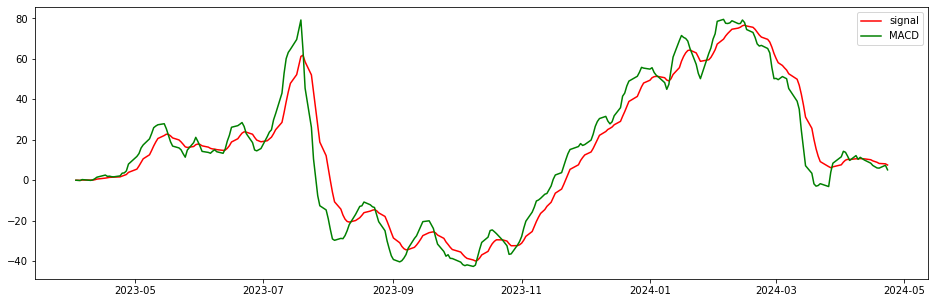

In [7]:
# Ploting MACD chart to get buy and sell signals
plt.figure(figsize=(16,5))
plt.plot(df.signal,label='signal', color = 'red')
plt.plot(df.MACD, label = 'MACD', color = 'green')
plt.legend()
plt.show()

In [8]:
Buy , Sell = [], []

for i in range (2,len(df)):
    if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD[i-1] < df.signal.iloc[i-1]:
        Buy.append(i)
    elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD[i-1] > df.signal.iloc[i-1]:
        Sell.append(i)
         

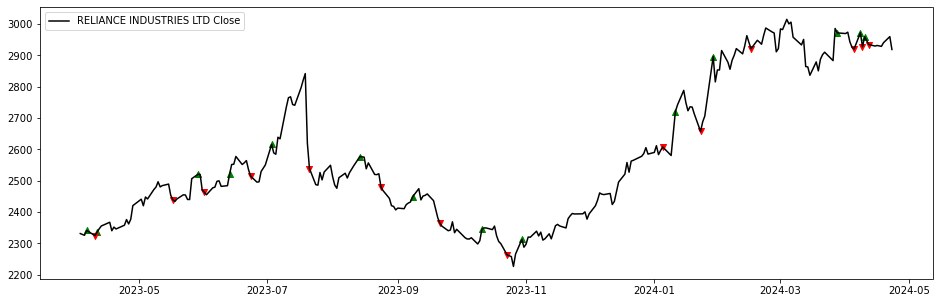

In [9]:
plt.figure(figsize=(16,5))

plt.scatter(df.iloc[Buy].index,df.iloc[Buy].Close,marker = "^", color = 'green')
plt.scatter(df.iloc[Sell].index,df.iloc[Sell].Close,marker = "v", color = 'red')
plt.plot(df.Close, label = 'RELIANCE INDUSTRIES LTD Close', color = 'k')
plt.legend()
plt.show()

In [10]:
# BackTesting 
Realbuys = [i for i in Buy]
Realsell = [i for i in Sell]

In [11]:
Buyprices = df.Open.iloc[Realbuys]
Sellprices = df.Open.iloc[Realsell]

In [12]:
# Buyprices

In [13]:
if Sellprices.index[0] < Buyprices.index[0]:
    Sellprices = Sellprices.drop(Sellprices.index[0])
elif Buyprices.index[-1] > Sellprices.index[-1]:
    Buyprices = Buyprices.drop(Buyprices.index[-1])
    

In [14]:
profitsrel = []

for i in range(len(Sellprices)):
    profitsrel.append(((Sellprices[i] - Buyprices[i])/Buyprices[i])*100)

In [15]:
profitsrel

[1.3739404266333026,
 5.526992287917738,
 -1.6203887346291117,
 1.358717434869743,
 1.991751529485343,
 0.035447026388345446,
 -2.6659836065573845,
 -1.0564064896627632,
 14.463500439753743,
 3.1778864234674686,
 8.20630267497251,
 -2.143515029724525,
 1.7789094140364732,
 0.6495720666962248]

In [16]:
print(f"Total profit from 2023-10-01 is {sum(profitsrel)}%")

Total profit from 2023-10-01 is 31.076725863647113%
